# Determines

-  Salaries in the field of data professions vary widely based on factors such as experience, job role, and performance. Accurately predicting salaries for data professionals is essential for both job seekers and employers.

The dataset contains the following columns:

**1.FIRST NAME:** First name

**2.LAST NAME:** Last name

**3.SEX:** Gender

**4.DOJ:** Date of joining the company

**5.CURRENT DATE:** Current date of data

**6.DESIGNATION:** Job role/designation

**7.AGE:** Age

**8.SALARY:** Target variable, the salary of the data professional

**9.UNIT:** Business unit or department

**10.LEAVES USED:** Number of leaves used

**11.LEAVES REMAINING:** Number of leaves remaining

**12.RATINGS:** Ratings or performance ratings

**13.PAST EXP:** Past work experience


# Tasks
Our Mission:
Your mission in this internship is to build a predictive model for salaries of data professionals. You will
follow these key steps:
1. Exploratory Data Analysis (EDA): Dive into the dataset, conduct comprehensive EDA, and unveil
valuable insights about data professionals' salaries. EDA will involve data visualization, summary
statistics, and identifying patterns in the data.
2. Feature Engineering: Create new features or transform existing ones that can provide additional
insights or improve model performance. Feature engineering might involve deriving features related to
experience, job role, and performance.
3. Data Preprocessing: Prepare the data for model training. This includes handling missing values,
encoding categorical variables, and scaling or normalizing features as needed.
4. Machine Learning Model Development: Train various machine learning regression models to predict
salaries. Experiment with different algorithms such as linear regression, decision trees, random forests,
and gradient boosting to find the best-performing model.
5. Model Evaluation: Assess the performance of your models using appropriate evaluation metrics like

Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-
squared (R2) score. Identify the model that provides the most accurate salary predictions.

6. ML Pipelines and Model Deployment: Create ML Pipelines to streamline the end-to-end machine
learning process, from data preprocessing to model training. Additionally, deploy a model that can
generate predictions for unseen data. Consider using frameworks like Flask or FastAPI for deployment.
7. Recommendations: Based on your findings and insights from the model, provide actionable
recommendations. These recommendations can be related to factors influencing salaries and potential
strategies for improving earnings in data professions.

# Import Modules, Load Data and Data Review

In [61]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)   
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500)    
pd.options.display.float_format = '{:.3f}'.format


from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# EDA

In [62]:
df0 = pd.read_csv("/Users/enejanhayytjanova/Desktop/My Githup/Mentorness/Project_1/Salary Prediction/Salary Prediction of Data Professions.csv")
df = df0.copy()

In [63]:
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.000,44570,Finance,24.000,6.000,2.000,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.000,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.000,40955,Finance,23.000,7.000,3.000,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.000,45550,IT,22.000,8.000,3.000,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.000,3.000,NaN,3


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.2+ KB


In [65]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
353,ABE,ALBERTO,M,12-14-2014,01-07-2016,Analyst,25.000,47183,IT,23.000,7.000,2.000,3
1146,ABE,ALBERTO,M,12-14-2014,01-07-2016,Analyst,25.000,47183,IT,23.000,7.000,2.000,3
982,ADAM,ABDALLA,M,12-30-2014,01-07-2016,Analyst,25.000,47590,IT,16.000,14.000,4.000,3
1757,ADAM,ABDALLA,M,12-30-2014,01-07-2016,Analyst,25.000,47590,IT,16.000,14.000,4.000,3
1793,ADELAIDE,ARCHIBOLD,F,11-11-2010,01-07-2016,Director,39.000,213987,Web,24.000,6.000,5.000,13
2546,ADELAIDE,ARCHIBOLD,F,11-11-2010,01-07-2016,Director,39.000,213987,Web,24.000,6.000,5.000,13
1090,AGNES,AMAN,F,05-09-2014,01-07-2016,Analyst,22.000,49660,Marketing,24.000,6.000,4.000,0
1824,AGNES,AMAN,F,05-09-2014,01-07-2016,Analyst,22.000,49660,Marketing,24.000,6.000,4.000,0
1938,ALANA,ANTONIOTTI,F,05-10-2013,01-07-2016,Analyst,24.000,48046,Operations,17.000,13.000,5.000,0
1994,ALANA,ANTONIOTTI,F,05-10-2013,01-07-2016,Analyst,24.000,48046,Operations,17.000,13.000,5.000,0


In [66]:
def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

In [67]:
duplicate_values(df)

Duplicate check...
There are 161 duplicated observations in the dataset.
161 duplicates were dropped!
No more duplicate rows!


In [68]:
df.shape

(2478, 13)

In [69]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending = False)
    missing_percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
    missing_values = pd.concat([missing_number, missing_percent], axis = 1, keys = ['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number'] > 0]

In [70]:
missing_values(df)

,Missing_Number,Missing_Percent
AGE,3,0.001
LEAVES USED,3,0.001
LAST NAME,2,0.001
LEAVES REMAINING,2,0.001
RATINGS,2,0.001
DOJ,1,0.000


In [71]:
df = df.dropna()

In [72]:
df.shape    # 8 rows were dropped

(2470, 13)

In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,2470.000,24.726,3.909,21.000,22.000,24.000,25.000,45.000
SALARY,2470.000,58055.765,36776.485,40001.000,43401.250,46737.500,50323.750,388112.000
LEAVES USED,2470.000,22.491,4.597,15.000,19.000,22.000,26.000,30.000
LEAVES REMAINING,2470.000,7.509,4.597,0.000,4.000,8.000,11.000,15.000
RATINGS,2470.000,3.482,1.115,2.000,2.000,3.000,4.000,5.000
PAST EXP,2470.000,1.556,2.704,0.000,0.000,1.000,2.000,23.000


In [74]:
df.columns

Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION',
       'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS',
       'PAST EXP'],
      dtype='object')

## Feature Engineering

In [75]:
df.select_dtypes(include ="object").head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,UNIT
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,Finance
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,Finance
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,IT
6,ELLIOT,AGULAR,M,09-02-2013,01-07-2016,Analyst,Marketing
8,KATHY,ALSOP,F,6-29-2014,01-07-2016,Senior Analyst,Operations


In [76]:
df.nunique().sort_values(ascending=False)

LAST NAME           2469
FIRST NAME          2359
SALARY              2299
DOJ                  965
AGE                   25
PAST EXP              21
LEAVES USED           16
LEAVES REMAINING      16
DESIGNATION            6
UNIT                   6
RATINGS                4
SEX                    2
CURRENT DATE           1
dtype: int64

In [77]:
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.000,44570,Finance,24.000,6.000,2.000,0
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.000,40955,Finance,23.000,7.000,3.000,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.000,45550,IT,22.000,8.000,3.000,0
6,ELLIOT,AGULAR,M,09-02-2013,01-07-2016,Analyst,22.000,40339,Marketing,19.000,11.000,5.000,0
8,KATHY,ALSOP,F,6-29-2014,01-07-2016,Senior Analyst,28.000,63478,Operations,20.000,10.000,3.000,1


In [78]:
df['DOJ'] = pd.to_datetime(df['DOJ'], format='%m-%d-%Y')
df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'], format='%m-%d-%Y')

In [79]:
df['DAYS IN COMPANY'] = (df['CURRENT DATE'] - df['DOJ']).dt.days

In [80]:
df.drop(columns=['DOJ', 'CURRENT DATE'], inplace=True)

In [81]:
df.head(1)

,FIRST NAME,LAST NAME,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,DAYS IN COMPANY
0,TOMASA,ARMEN,F,Analyst,21.000,44570,Finance,24.000,6.000,2.000,0,599


In [82]:
df.DESIGNATION.unique()

array(['Analyst', 'Senior Analyst', 'Associate', 'Senior Manager',
       'Manager', 'Director'], dtype=object)

In [83]:
for col in df.select_dtypes('object'):
    print(f"{col:<20}:", df[col].nunique())

FIRST NAME          : 2359
LAST NAME           : 2469
SEX                 : 2
DESIGNATION         : 6
UNIT                : 6


In [84]:
df.DESIGNATION.value_counts()

DESIGNATION
Analyst           1848
Senior Analyst     301
Associate          155
Manager             79
Senior Manager      60
Director            27
Name: count, dtype: int64

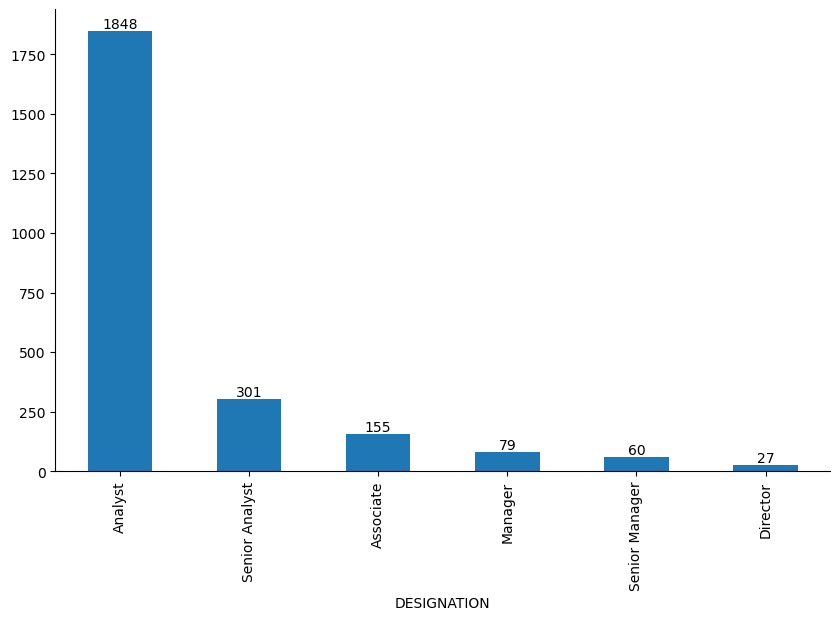

In [85]:
ax = df.DESIGNATION.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.axis("off")  
ax.bar_label(ax.containers[0]);

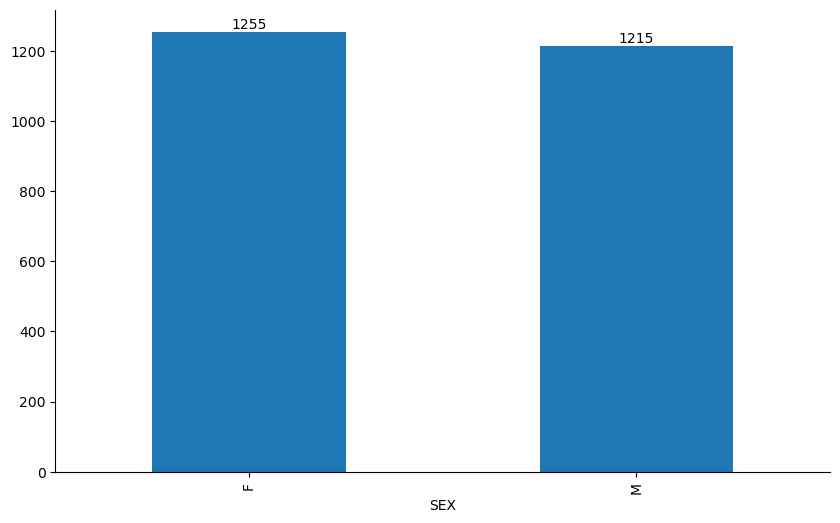

In [86]:
ax = df.SEX.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.axis("off")   
ax.bar_label(ax.containers[0]);

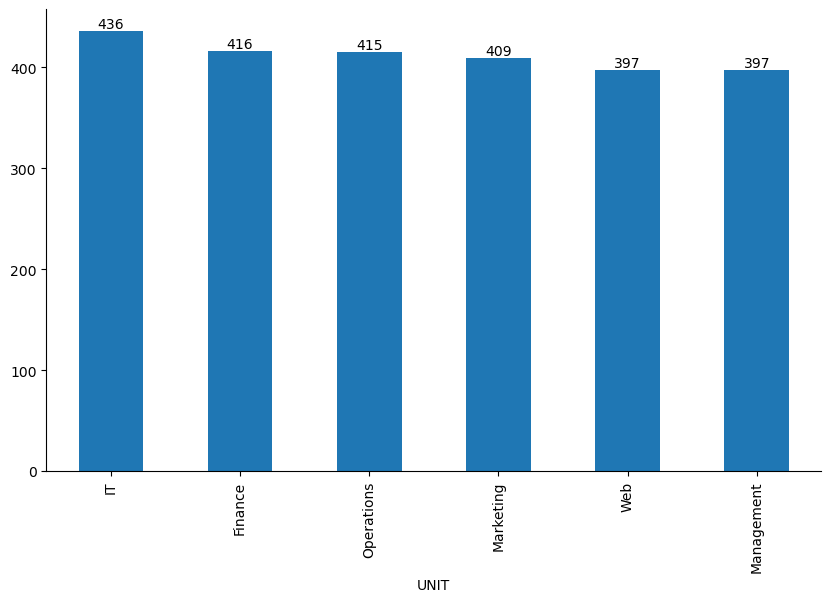

In [87]:
ax = df.UNIT.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.axis("off")
ax.bar_label(ax.containers[0]);

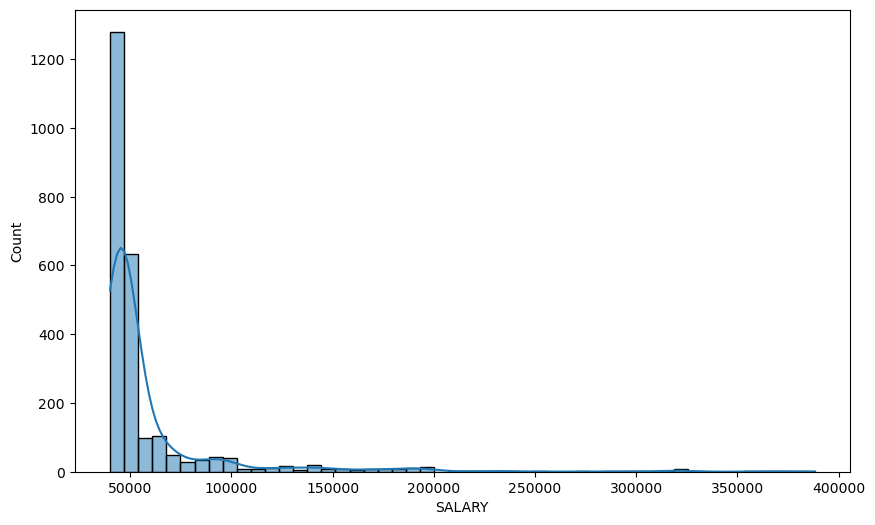

In [88]:
sns.histplot(df.SALARY, bins=50, kde=True);

In [89]:
df_numeric = df.select_dtypes(include ="number")
df_numeric

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,DAYS IN COMPANY
0,21.000,44570,24.000,6.000,2.000,0,599
2,21.000,40955,23.000,7.000,3.000,0,528
3,22.000,45550,22.000,8.000,3.000,0,1009
6,22.000,40339,19.000,11.000,5.000,0,857
8,28.000,63478,20.000,10.000,3.000,1,557
...,...,...,...,...,...,...,...
2634,36.000,185977,15.000,15.000,5.000,10,1654
2635,23.000,45758,17.000,13.000,2.000,0,723
2636,21.000,47315,29.000,1.000,5.000,0,714
2637,24.000,45172,23.000,7.000,3.000,1,661


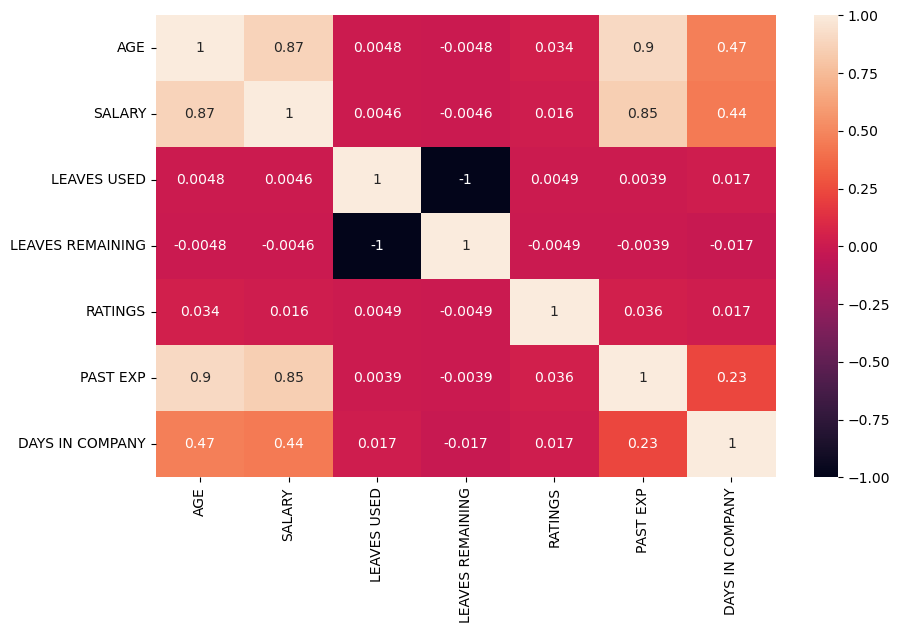

In [90]:
sns.heatmap(df_numeric.corr(), annot =True);

## Multicollinearity control

In [91]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any()

AGE                  True
SALARY              False
LEAVES USED         False
LEAVES REMAINING    False
RATINGS             False
PAST EXP             True
DAYS IN COMPANY     False
dtype: bool

In [92]:
df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any()

AGE                 False
SALARY              False
LEAVES USED         False
LEAVES REMAINING    False
RATINGS             False
PAST EXP            False
DAYS IN COMPANY     False
dtype: bool

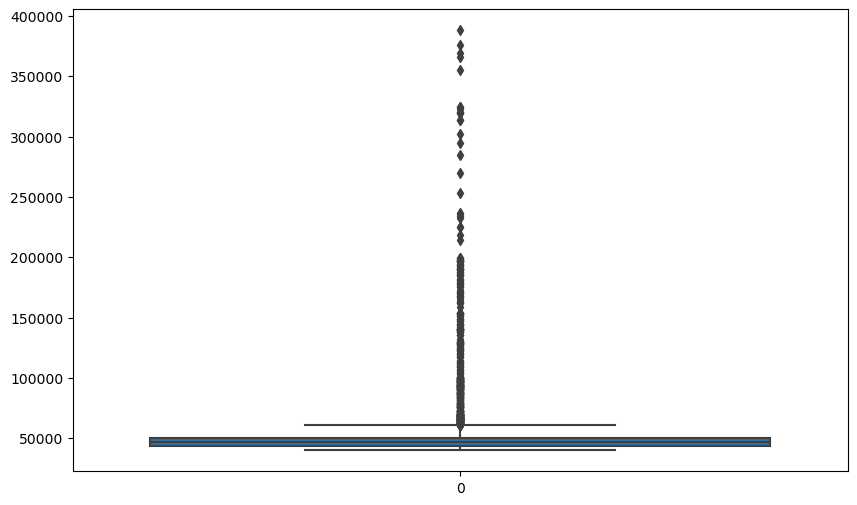

In [93]:
sns.boxplot(df.SALARY);

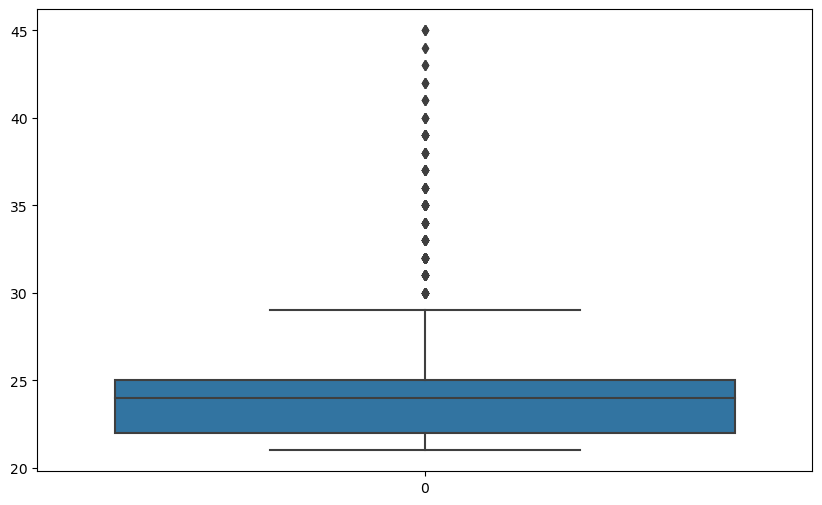

In [94]:
sns.boxplot(df.AGE);

In [95]:
df.columns

Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DESIGNATION', 'AGE', 'SALARY',
       'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP',
       'DAYS IN COMPANY'],
      dtype='object')

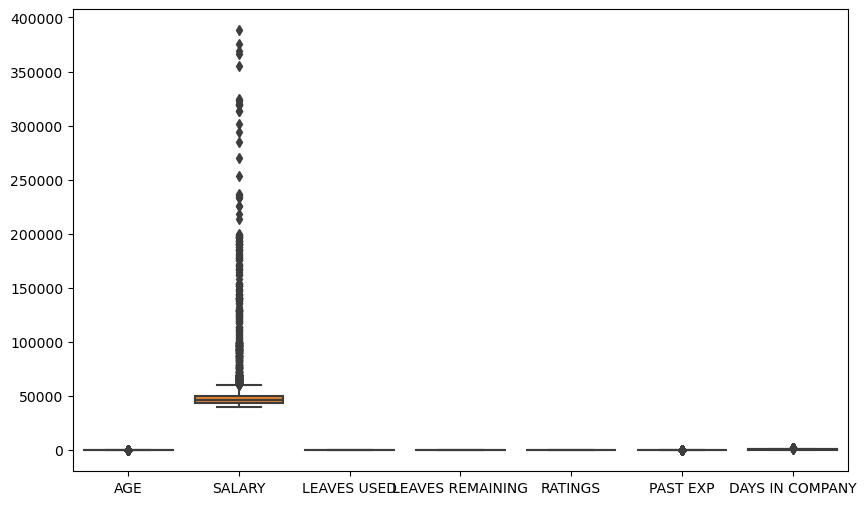

In [96]:
sns.boxplot(df.select_dtypes('number'));

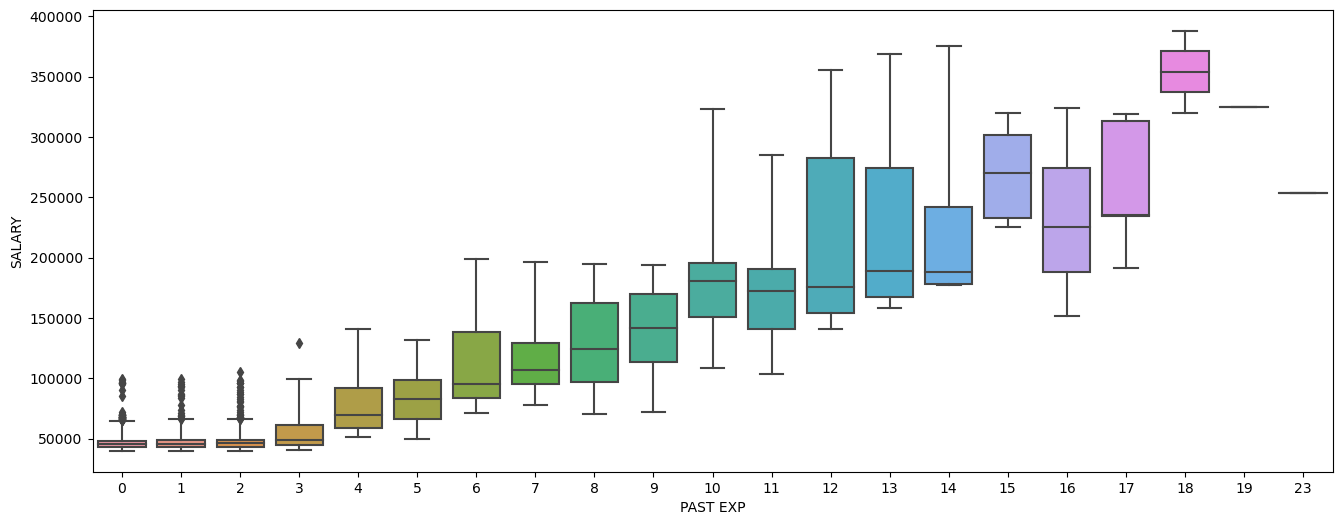

In [97]:
plt.figure(figsize=(16,6))
sns.boxplot(x="PAST EXP", y="SALARY", data=df, whis=3)
plt.show()

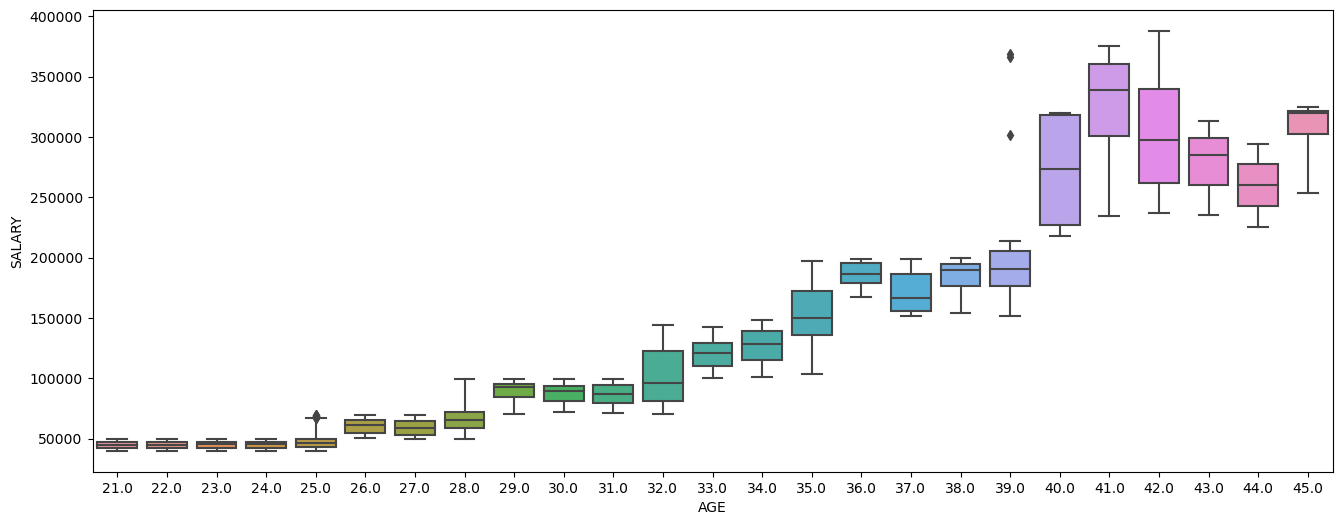

In [98]:
plt.figure(figsize=(16,6))
sns.boxplot(x="AGE", y="SALARY", data=df, whis=3)
plt.show()

In [99]:
df.isnull().any().any().sum()

0

In [101]:
corr_by_SALARY = df.select_dtypes('number').corr()["SALARY"].sort_values()[:-1]
corr_by_SALARY

LEAVES REMAINING   -0.005
LEAVES USED         0.005
RATINGS             0.016
DAYS IN COMPANY     0.441
PAST EXP            0.851
AGE                 0.869
Name: SALARY, dtype: float64

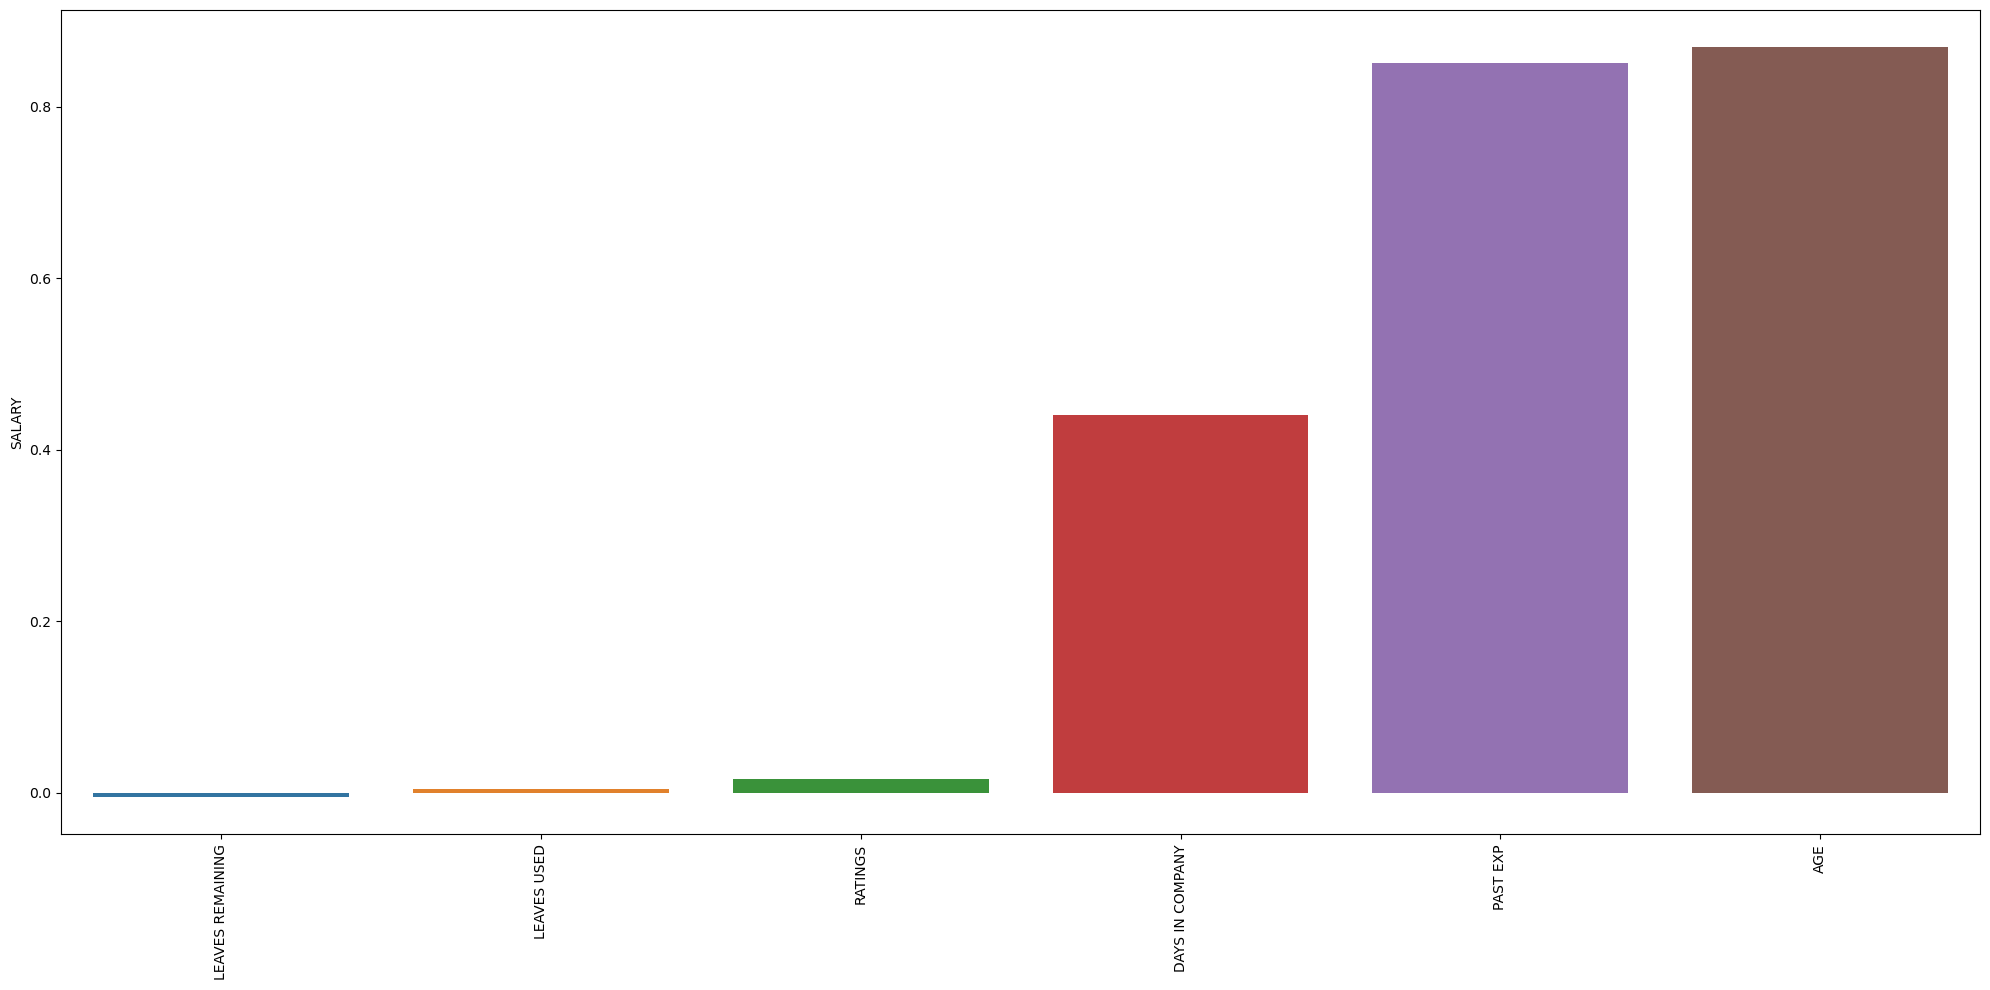

In [102]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_SALARY.index, y = corr_by_SALARY)
plt.xticks(rotation=90)
plt.tight_layout();

# Train | Test Split

In [103]:
df.head()

,FIRST NAME,LAST NAME,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,DAYS IN COMPANY
0,TOMASA,ARMEN,F,Analyst,21.000,44570,Finance,24.000,6.000,2.000,0,599
2,OLIVE,ANCY,F,Analyst,21.000,40955,Finance,23.000,7.000,3.000,0,528
3,CHERRY,AQUILAR,F,Analyst,22.000,45550,IT,22.000,8.000,3.000,0,1009
6,ELLIOT,AGULAR,M,Analyst,22.000,40339,Marketing,19.000,11.000,5.000,0,857
8,KATHY,ALSOP,F,Senior Analyst,28.000,63478,Operations,20.000,10.000,3.000,1,557


In [104]:
X= df[['DESIGNATION', 'UNIT', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP', 'DAYS IN COMPANY']]
y= df['SALARY']


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
X_train.shape

(1976, 6)

In [107]:
X_test.shape

(494, 6)

# Implement Linear Regression

## Model

In [108]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {
    "train": {
    "R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {
    "R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
               }
    
    return pd.DataFrame(scores)

In [109]:
X.columns

Index(['DESIGNATION', 'UNIT', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP',
       'DAYS IN COMPANY'],
      dtype='object')

In [110]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",drop="first",
                                                     sparse_output=False),['DESIGNATION', 'UNIT']),
    remainder=StandardScaler())


operations = [('column_trans',column_trans), ('lm_model', LinearRegression())]
                                              
lm_pipe = Pipeline(steps= operations)

lm_pipe.fit(X_train, y_train)


Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['DESIGNATION', 'UNIT'])])),
                ('lm_model', LinearRegression())])

In [111]:
train_val(lm_pipe, X_train, y_train, X_test, y_test)

,train,test
R2,0.959,0.952
mae,4173.311,4134.633
mse,56388327.870,62424712.822
rmse,7509.216,7900.931


In [112]:
y_pred = lm_pipe.predict(X_test)
lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## Adjusted R2 Score

In [113]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)     
    n = df.shape[0]                    
    p = df.shape[1]-1                   
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)   
    return adj_r2

In [114]:
y_pred = lm_pipe.predict(X_test)

In [115]:
adj_r2(y_test, y_pred, df)

0.9517110691832182

## Cross Validate

In [116]:
operations = [('column_trans',column_trans), ('lm_model', LinearRegression())]                                             
lm_pipe = Pipeline(steps= operations)

scores = cross_validate(lm_pipe, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
             cv =10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_r2                                     0.951
train_r2                                    0.959
test_neg_mean_absolute_error            -4262.725
train_neg_mean_absolute_error           -4169.781
test_neg_mean_squared_error         -63214273.953
train_neg_mean_squared_error        -56035448.265
test_neg_root_mean_squared_error        -7802.361
train_neg_root_mean_squared_error       -7484.101
dtype: float64

In [117]:
7802/df.SALARY.mean()

0.13438803243613207

## Residual Plot

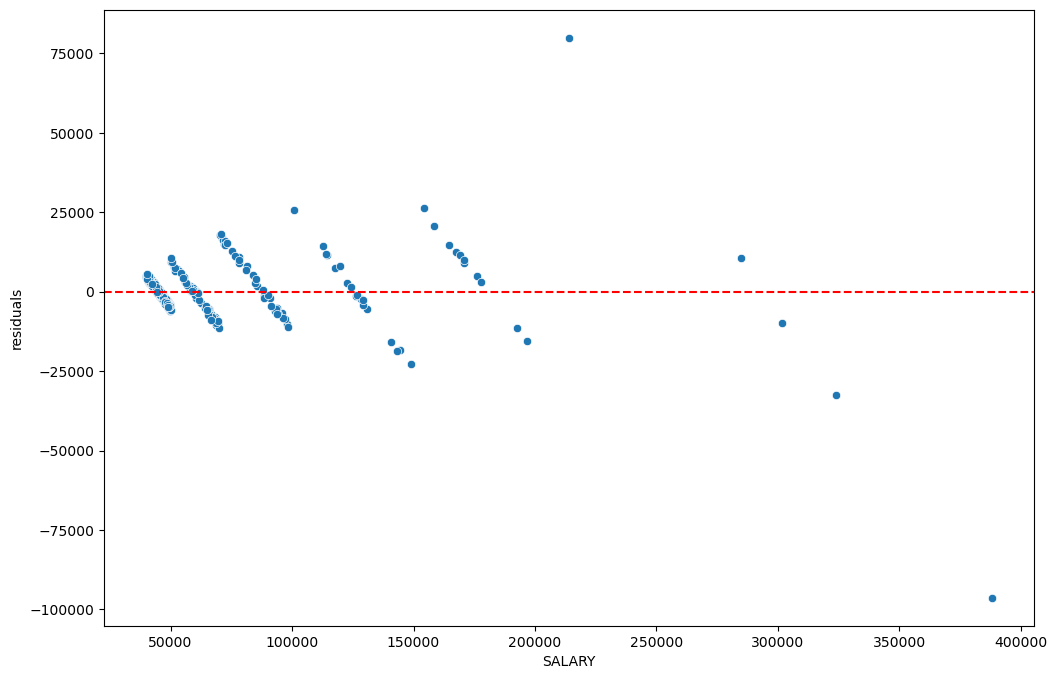

In [118]:
plt.figure(figsize=(12,8))
residuals = y_test-y_pred

sns.scatterplot(x = y_test, y = -residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

## Dropping observations from the dataset that worsen my predictions

In [119]:
df.nunique().sort_values(ascending=False)

LAST NAME           2469
FIRST NAME          2359
SALARY              2299
DAYS IN COMPANY      965
AGE                   25
PAST EXP              21
LEAVES USED           16
LEAVES REMAINING      16
DESIGNATION            6
UNIT                   6
RATINGS                4
SEX                    2
dtype: int64

In [120]:
X1= df[['DESIGNATION', 'UNIT', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP', 'DAYS IN COMPANY', 'SEX', 'LEAVES USED', 'AGE']]
y1= df['SALARY']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [122]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",drop="first",
                                                     sparse_output=False),['DESIGNATION', 'UNIT', 'SEX']),
    remainder=StandardScaler())


operations = [('column_trans',column_trans), ('lm2_model', LinearRegression())]
                                              
lm2_pipe = Pipeline(steps= operations)

lm2_pipe.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['DESIGNATION', 'UNIT',
                                                   'SEX'])])),
                ('lm2_model', LinearRegression())])

In [123]:
train_val(lm2_pipe, X_train, y_train, X_test, y_test)

,train,test
R2,0.959,0.952
mae,4171.119,4129.094
mse,56330651.906,62458959.599
rmse,7505.375,7903.098


In [124]:
7903/df.SALARY.mean()   # as a result no serious change!

0.13612773908520273

In [125]:
y_pred = lm2_pipe.predict(X_test)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [126]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [127]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
261,48981,46215.205,2765.795
1358,41920,44555.076,-2635.076
1238,49736,44636.028,5099.972
1359,47754,45601.891,2152.109
1443,48360,45061.055,3298.945
1348,40196,44639.056,-4443.056
1393,48104,45059.600,3044.400
2164,40752,45332.072,-4580.072
581,62673,59159.465,3513.535
2037,43453,46060.409,-2607.409


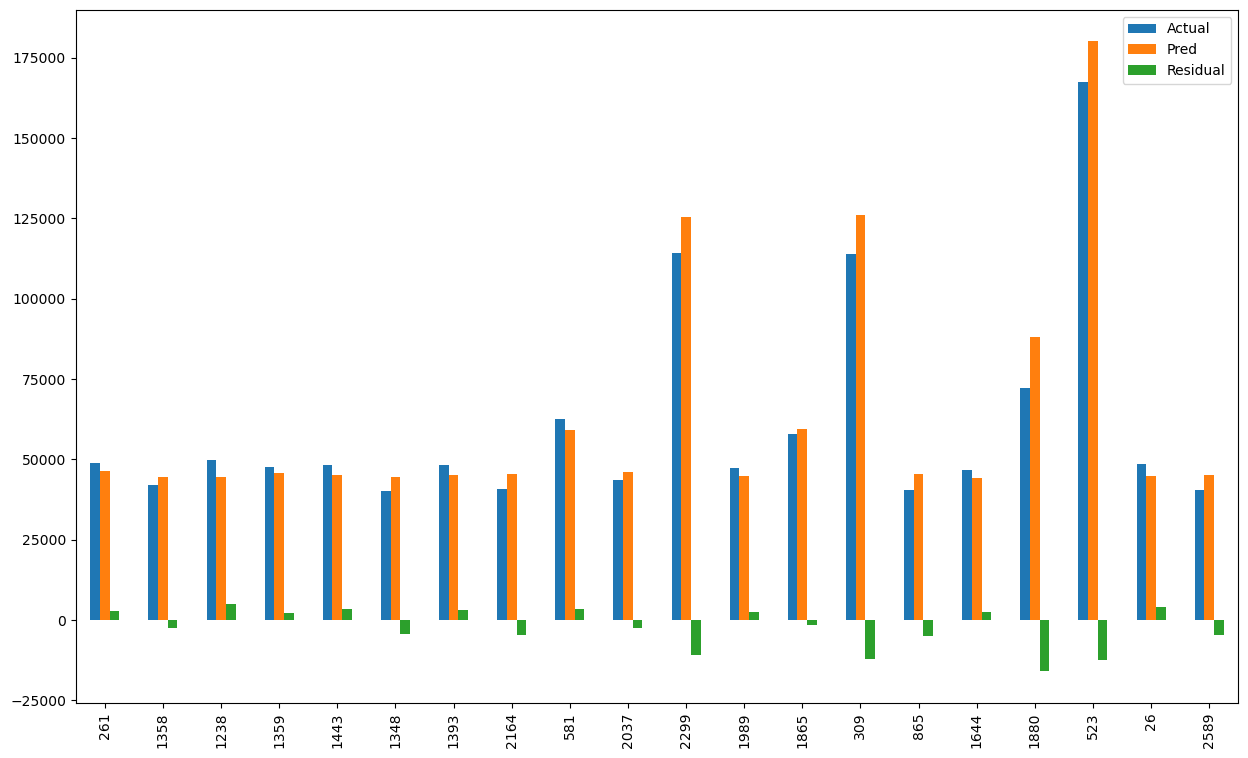

In [128]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()

In [129]:
X2= df[['DESIGNATION', 'RATINGS', 'PAST EXP', 'DAYS IN COMPANY']]
y2= df['SALARY']

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [131]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",drop="first",
                                                     sparse_output=False),['DESIGNATION']),
    remainder=StandardScaler())


operations = [('column_trans',column_trans), ('lm3_model', LinearRegression())]
                                              
lm3_pipe = Pipeline(steps= operations)

lm3_pipe.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['DESIGNATION'])])),
                ('lm3_model', LinearRegression())])

In [132]:
train_val(lm3_pipe, X_train, y_train, X_test, y_test)

,train,test
R2,0.959,0.952
mae,4167.162,4109.232
mse,56498810.643,61851596.918
rmse,7516.569,7864.579


In [133]:
y_pred = lm3_pipe.predict(X_test)
lm3_R2 = r2_score(y_test, y_pred)
lm3_mae = mean_absolute_error(y_test, y_pred)
lm3_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Implement Ridge Regression

In [134]:
from sklearn.linear_model import Ridge

In [135]:
X= df[['DESIGNATION', 'UNIT', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP', 'DAYS IN COMPANY']]
y= df['SALARY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",drop="first",
                                                     sparse_output=False),['DESIGNATION', 'UNIT']),
    remainder=StandardScaler())


operations = [('column_trans',column_trans), ('rd_model', Ridge(random_state=42))]
                                              
rd_pipe = Pipeline(steps= operations)

rd_pipe.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['DESIGNATION', 'UNIT'])])),
                ('rd_model', Ridge(random_state=42))])

In [137]:
train_val(rd_pipe, X_train, y_train, X_test, y_test)

,train,test
R2,0.954,0.947
mae,4545.004,4420.008
mse,62893200.200,69140327.715
rmse,7930.523,8315.066


In [138]:
y_pred = rd_pipe.predict(X_test)
rd_R2 = r2_score(y_test, y_pred)
rd_mae = mean_absolute_error(y_test, y_pred)
rd_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Implement Lasso Regression

In [139]:
from sklearn.linear_model import Lasso

In [140]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",drop="first",
                                                     sparse_output=False),['DESIGNATION', 'UNIT']),
    remainder=StandardScaler())


operations = [('column_trans',column_trans), ('ls_model', Lasso(random_state=42))]
                                              
ls_pipe = Pipeline(steps= operations)

ls_pipe.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['DESIGNATION', 'UNIT'])])),
                ('ls_model', Lasso(random_state=42))])

In [141]:
train_val(ls_pipe, X_train, y_train, X_test, y_test)

,train,test
R2,0.959,0.952
mae,4173.452,4131.913
mse,56390190.790,62388818.438
rmse,7509.340,7898.659


In [142]:
y_pred = ls_pipe.predict(X_test)
ls_R2 = r2_score(y_test, y_pred)
ls_mae = mean_absolute_error(y_test, y_pred)
ls_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Implement Elastic-Net

In [143]:
from sklearn.linear_model import ElasticNet

In [144]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",drop="first",
                                                     sparse_output=False),['DESIGNATION', 'UNIT']),
    remainder=StandardScaler())


operations = [('column_trans',column_trans), ('el_model', ElasticNet(random_state=42))]
                                              
el_pipe = Pipeline(steps= operations)

el_pipe.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['DESIGNATION', 'UNIT'])])),
                ('el_model', ElasticNet(random_state=42))])

In [145]:
train_val(el_pipe, X_train, y_train, X_test, y_test)

,train,test
R2,0.726,0.697
mae,10377.069,10565.761
mse,373673864.712,393049030.487
rmse,19330.646,19825.464


In [146]:
y_pred = el_pipe.predict(X_test)
el_R2 = r2_score(y_test, y_pred)
el_mae = mean_absolute_error(y_test, y_pred)
el_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# XGBOOST

In [147]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",drop="first",
                                                     sparse_output=False),['DESIGNATION', 'UNIT']),
    remainder=StandardScaler())


operations = [('column_trans',column_trans), ('xgb_model', XGBRegressor())]
                                              
xgb_pipe = Pipeline(steps= operations)

xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['DESIGNATION', 'UNIT'])])),
                ('xgb_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [148]:
train_val(xgb_pipe, X_train, y_train, X_test, y_test)

,train,test
R2,0.998,0.926
mae,1288.526,4773.572
mse,2699961.109,96131833.840
rmse,1643.156,9804.684


In [149]:
y_pred = xgb_pipe.predict(X_test)
xgb_R2 = r2_score(y_test, y_pred)
xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Random Forest

In [150]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",drop="first",
                                                     sparse_output=False),['DESIGNATION', 'UNIT']),
    remainder=StandardScaler())


operations = [('column_trans',column_trans), ('rf_model', RandomForestRegressor())]
                                              
rf_pipe = Pipeline(steps= operations)

rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['DESIGNATION', 'UNIT'])])),
                ('rf_model', RandomForestRegressor())])

In [151]:
train_val(rf_pipe, X_train, y_train, X_test, y_test)

,train,test
R2,0.993,0.937
mae,1661.240,4446.141
mse,9698384.571,82053486.911
rmse,3114.223,9058.338


In [152]:
y_pred = rf_pipe.predict(X_test)
rf_R2 = r2_score(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compare Models Performance

In [153]:
scores = {
    "linear_m": {
        "r2_score": lm_R2,
        "mae": lm_mae,
        "rmse": lm_rmse
    },
    
     "linear3_m": {
        "r2_score": lm3_R2,
        "mae": lm3_mae,
        "rmse": lm3_rmse
     },
    
    "ridge_m": {
        "r2_score": rd_R2,
        "mae": rd_mae,
        "rmse": rd_rmse
    },
    "lasso_m": {
        "r2_score": ls_R2,
        "mae": ls_mae,
        "rmse": ls_rmse
    },
    "elastic_m": {
        "r2_score": el_R2,
        "mae": el_mae,
        "rmse": el_rmse
    },
    "xgb_m": {
        "r2_score": xgb_R2,
        "mae": xgb_mae,
        "rmse": xgb_rmse
    },
     "rf_m": {
        "r2_score": rf_R2,
        "mae": rf_mae,
        "rmse": rf_rmse
    }
}
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_m,0.952,4129.094,7903.098
linear3_m,0.952,4109.232,7864.579
ridge_m,0.947,4420.008,8315.066
lasso_m,0.952,4131.913,7898.659
elastic_m,0.697,10565.761,19825.464
xgb_m,0.926,4773.572,9804.684
rf_m,0.937,4446.141,9058.338


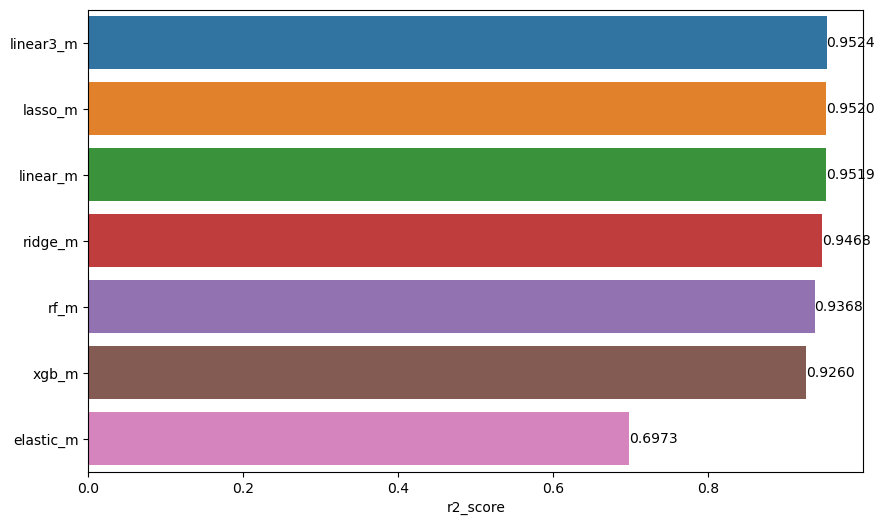

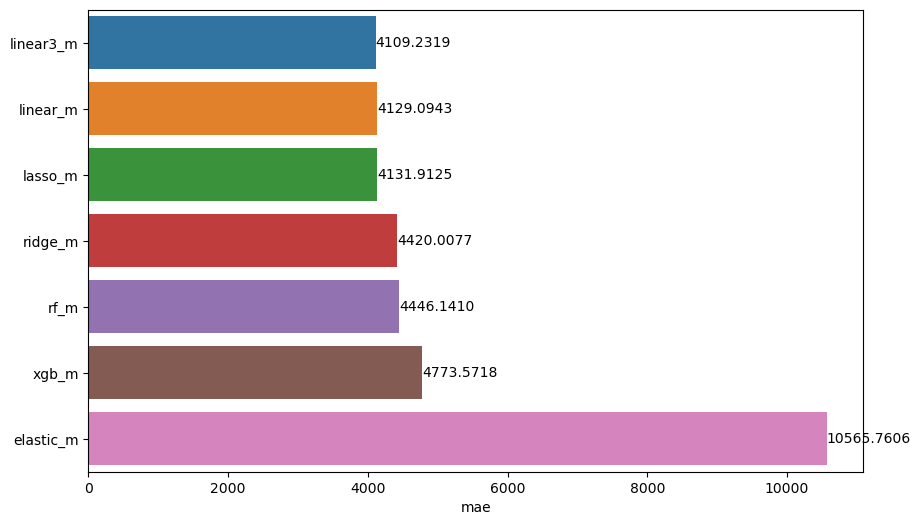

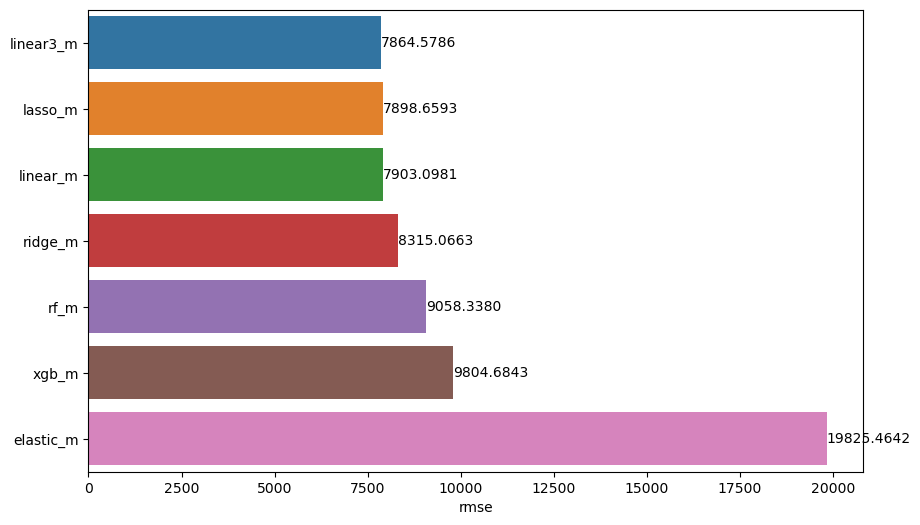

In [154]:
#metrics = scores.columns

for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False 
    else:
        ascending = True 
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    for p in ax.patches:
            width = p.get_width()                        # get bar length
            ax.text(width,                               # set the text at 1 unit right of the bar
                    p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                    '{:.4f}'.format(width),             # set variable to display, 2 decimals
                    ha = 'left',                         # horizontal alignment
                    va = 'center') 

##  Prediction with random samples

In [155]:
#df_new.to_csv('Salary_data.csv', index=False)

In [156]:
df_new = df[['DESIGNATION','RATINGS', 'PAST EXP', 'DAYS IN COMPANY', 'SALARY']]

In [157]:
X= df_new[['DESIGNATION', 'RATINGS', 'PAST EXP', 'DAYS IN COMPANY']]
y= df_new['SALARY']


In [158]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",drop="first",
                                                     sparse_output=False),['DESIGNATION']),
    remainder=StandardScaler())


operations = [('column_trans',column_trans), ('linear_model', LinearRegression())]
                                              
linear_model = Pipeline(steps= operations)

linear_model.fit(X, y)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['DESIGNATION'])])),
                ('linear_model', LinearRegression())])

In [159]:
random_samples = df_new.sample(n=20)

In [160]:
X_random = random_samples.drop(columns=["SALARY"])

In [161]:
predictions =linear_model.predict(X_random)
predictions

array([ 44937.84673699,  45052.1393242 ,  87450.10108192,  45375.79987336,
        60151.84533413,  59937.30748153,  45193.02835516,  87224.96832938,
       125594.33698337,  44946.13360683,  87348.81099536,  45225.13101335,
        45000.45864247,  45252.87184888,  45143.18920005,  44834.13068427,
        45152.85109306,  44868.32298483,  45084.37216207,  44935.89339612])

In [162]:
true_labels = random_samples["SALARY"].values
true_labels

array([ 48410,  40231,  85391,  42008,  61575,  50084,  48122,  76494,
       144573,  41531,  76887,  41546,  47530,  42886,  48739,  46556,
        48451,  40288,  42791,  48747])

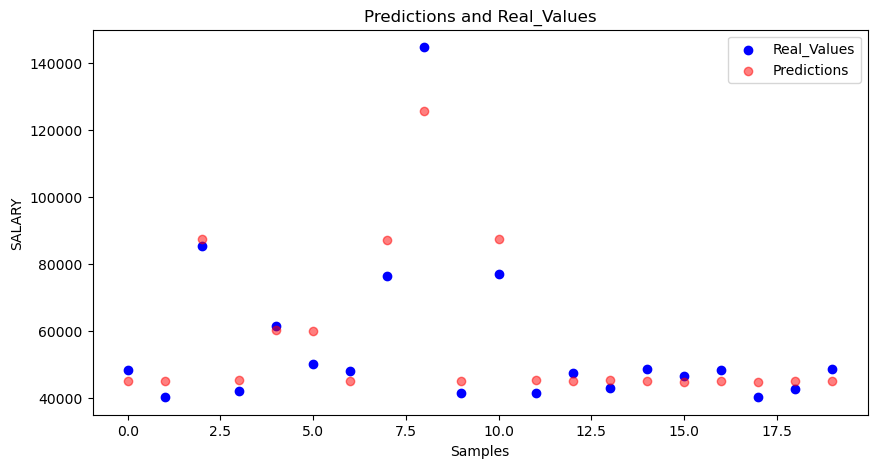

In [163]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(true_labels)), true_labels, color='blue', label='Real_Values')
plt.scatter(range(len(predictions)), predictions, color='red', label='Predictions', alpha=0.5)
plt.title('Predictions and Real_Values')
plt.xlabel('Samples')
plt.ylabel('SALARY')
plt.legend()
plt.show()

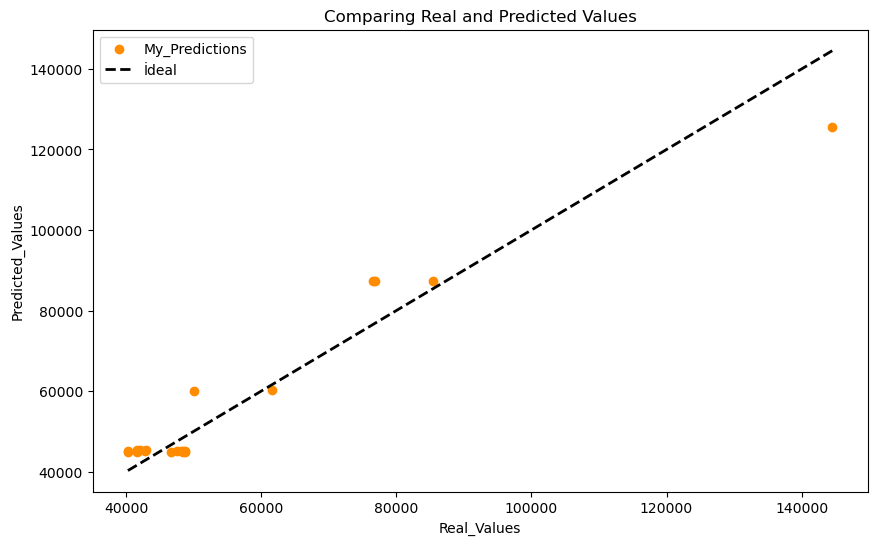

In [164]:
plt.figure(figsize=(10, 6))
plt.scatter(true_labels, predictions, color='darkorange', label='My_Predictions')
plt.plot([min(true_labels), max(true_labels)], [min(true_labels), max(true_labels)], 'k--', lw=2, label='İdeal')
plt.xlabel('Real_Values')
plt.ylabel('Predicted_Values')
plt.title('Comparing Real and Predicted Values')
plt.legend()
plt.show()

# Final Model

In [165]:
import pickle

In [166]:
with open('linear_model.pkl', 'wb') as f:
    pickle.dump(linear_model, f)

In [167]:
with open('linear_model.pkl', 'rb') as f:
    loaded_linear_model = pickle.load(f)

In [168]:
predictions = loaded_linear_model.predict(X_random)

In [169]:
predictions

array([ 44937.84673699,  45052.1393242 ,  87450.10108192,  45375.79987336,
        60151.84533413,  59937.30748153,  45193.02835516,  87224.96832938,
       125594.33698337,  44946.13360683,  87348.81099536,  45225.13101335,
        45000.45864247,  45252.87184888,  45143.18920005,  44834.13068427,
        45152.85109306,  44868.32298483,  45084.37216207,  44935.89339612])